# OASIS-2 dataset (MRI)
---
    
* #### 순서
    * 1) 정형데이터(demographic data) 만으로 분석 및 예측
    * **2) 비정형데이터(MRI) 만으로 분석 및 예측**
    * 3) 비정형데이터(MRI) feature extraction + 정형데이터(demographic data) 함께 고려해서 분석 및 예측 
       
---

* #### 데이터셋 : [Kaggle](https://www.kaggle.com/datasets/conormcmullan/oasis2), [OASIS Brains org : Longitudinal MRI Data in Nondemented and Demented Older Adults](https://www.oasis-brains.org/#data)  
    
* #### 참고 : [Kaggle notebook](https://www.kaggle.com/code/tomdomers/oasis-brain-analysis)  
    
    
* #### 데이터 설명 :
    * 피험자 : 150명
    * MR 세션 : 373개
    * 요약 : 이 데이터셋은 60세에서 96세 사이의 150명의 피험자를 대상으로 한 종단적 컬렉션으로 구성되어 있습니다. 각 피험자는 최소 1년 간격으로 두 번 이상 방문하여 총 373회의 촬영 세션을 통해 스캔했습니다. 각 피험자에 대해 단일 스캔 세션에서 얻은 3~4개의 개별 T1 가중 MRI 스캔이 포함됩니다. 피험자는 모두 오른손잡이였으며 남성과 여성이 모두 포함되었습니다. 피험자 중 72명은 연구 기간 내내 무감각한 것으로 특징지어졌습니다. 포함된 피험자 중 64명은 최초 방문 시 치매로 분류되었으며, 경증에서 중등도의 알츠하이머병을 앓고 있는 51명을 포함하여 후속 스캔에서도 그 상태를 유지했습니다. 또 다른 14명의 피험자는 첫 방문 당시에는 치매가 아닌 것으로 분류되었으나 이후 방문 시 치매로 분류되었습니다.
---

In [1]:
# 3차원 의료이미지(MRI) 관련 라이브러리 설치
!pip install nibabel

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 3.3 MB 15.2 MB/s            
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  NOTE: The current PATH contains path(s) starting with `~`, which may not be expanded by all applications.


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from tqdm import tqdm
import gc  # garbage collector; 가비지 수거기
import psutil  # python system and process utilities; 실행중인 프로세스, 리소스 정보 검색

# 파일 경로 관련
import os  # 운영체제 관련 명령어 모음
from pathlib import Path  # 객체 지향 파일 시스템 경로
from glob import glob

# 이미지 파일 관련
from PIL import Image
import nibabel as nib
from IPython.display import display, HTML
import cv2
from scipy.ndimage import rotate

import re


# OASIS-2

### 1. OASIS-2 dataset 가져오기

In [3]:
len(glob('../OASIS-2 dataset/OAS2_*'))

60

In [ ]:
with tqdm(total=file_count) as pbar: # tqdm을 사용하여 프로그레스바 표시
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            filepath = os.path.join(subdir, file)

            if filepath.endswith("nifti.img"): # 파일 확장자가 nifti.img인 경우

In [57]:
# 'OASIS-2 dataset' 폴더 경로
data_dir = '../OASIS-2 dataset/'

img_paths = sorted(glob(os.path.join(data_dir, '**/*.nifti.img'), recursive=True))
imgs = []

for img_path in img_paths:
    print(img_path)
    try:
        img_arr = nib.load(img_path).get_fdata()
        imgs.append(img_arr)
        
    except Exception as e:
        print(f"{img_path} : {e}")


# 이미지 파일 개수 확인
print(len(imgs))

../OASIS-2 dataset/OAS2_0004_MR2/mpr-1.nifti.img
../OASIS-2 dataset/OAS2_0004_MR2/mpr-1.nifti.img : Cannot work out file type of "../OASIS-2 dataset/OAS2_0004_MR2/mpr-1.nifti.img"
../OASIS-2 dataset/OAS2_0004_MR2/mpr-2.nifti.img
../OASIS-2 dataset/OAS2_0004_MR2/mpr-3.nifti.img
../OASIS-2 dataset/OAS2_0004_MR2/mpr-4.nifti.img
../OASIS-2 dataset/OAS2_0005_MR1/mpr-1.nifti.img
../OASIS-2 dataset/OAS2_0005_MR1/mpr-2.nifti.img
../OASIS-2 dataset/OAS2_0005_MR1/mpr-3.nifti.img
../OASIS-2 dataset/OAS2_0005_MR1/mpr-4.nifti.img
../OASIS-2 dataset/OAS2_0005_MR2/mpr-1.nifti.img
../OASIS-2 dataset/OAS2_0005_MR2/mpr-2.nifti.img
../OASIS-2 dataset/OAS2_0005_MR2/mpr-3.nifti.img
../OASIS-2 dataset/OAS2_0005_MR3/mpr-1.nifti.img
../OASIS-2 dataset/OAS2_0005_MR3/mpr-2.nifti.img
../OASIS-2 dataset/OAS2_0005_MR3/mpr-3.nifti.img
../OASIS-2 dataset/OAS2_0007_MR1/mpr-1.nifti.img
../OASIS-2 dataset/OAS2_0007_MR1/mpr-2.nifti.img
../OASIS-2 dataset/OAS2_0007_MR1/mpr-3.nifti.img
../OASIS-2 dataset/OAS2_0007_MR1/mpr

../OASIS-2 dataset/OAS2_0028_MR1/mpr-3.nifti.img
../OASIS-2 dataset/OAS2_0028_MR1/mpr-4.nifti.img
../OASIS-2 dataset/OAS2_0028_MR2/mpr-1.nifti.img
../OASIS-2 dataset/OAS2_0028_MR2/mpr-2.nifti.img
../OASIS-2 dataset/OAS2_0028_MR2/mpr-3.nifti.img
../OASIS-2 dataset/OAS2_0028_MR2/mpr-4.nifti.img
../OASIS-2 dataset/OAS2_0029_MR1/mpr-1.nifti.img
../OASIS-2 dataset/OAS2_0029_MR1/mpr-2.nifti.img
../OASIS-2 dataset/OAS2_0029_MR1/mpr-3.nifti.img
../OASIS-2 dataset/OAS2_0029_MR1/mpr-4.nifti.img
../OASIS-2 dataset/OAS2_0029_MR2/mpr-1.nifti.img
../OASIS-2 dataset/OAS2_0029_MR2/mpr-2.nifti.img
../OASIS-2 dataset/OAS2_0029_MR2/mpr-3.nifti.img
../OASIS-2 dataset/OAS2_0029_MR2/mpr-4.nifti.img
../OASIS-2 dataset/OAS2_0030_MR1/mpr-1.nifti.img
../OASIS-2 dataset/OAS2_0030_MR1/mpr-2.nifti.img
../OASIS-2 dataset/OAS2_0030_MR1/mpr-3.nifti.img
../OASIS-2 dataset/OAS2_0030_MR1/mpr-4.nifti.img
../OASIS-2 dataset/OAS2_0030_MR2/mpr-1.nifti.img
../OASIS-2 dataset/OAS2_0030_MR2/mpr-2.nifti.img
../OASIS-2 dataset/O

220


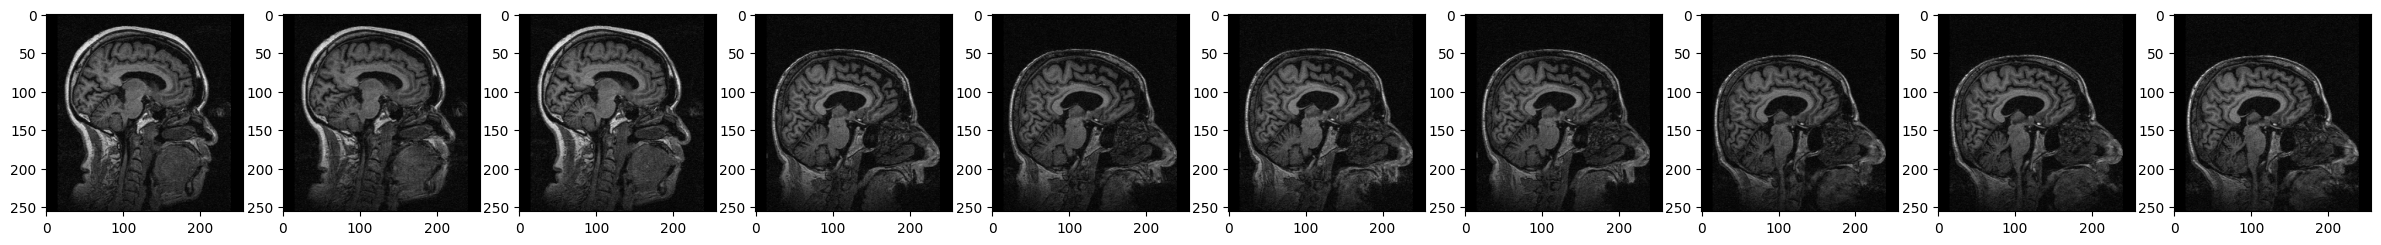

In [66]:
fig, axes = plt.subplots(1, 10, figsize=(30, 5))
for i in range(10):
    rotated_img = rotate(imgs[i], 90, reshape=False)
    axes[i].imshow(rotated_img[:, :, 70], cmap='gray')

print(len(imgs))

220


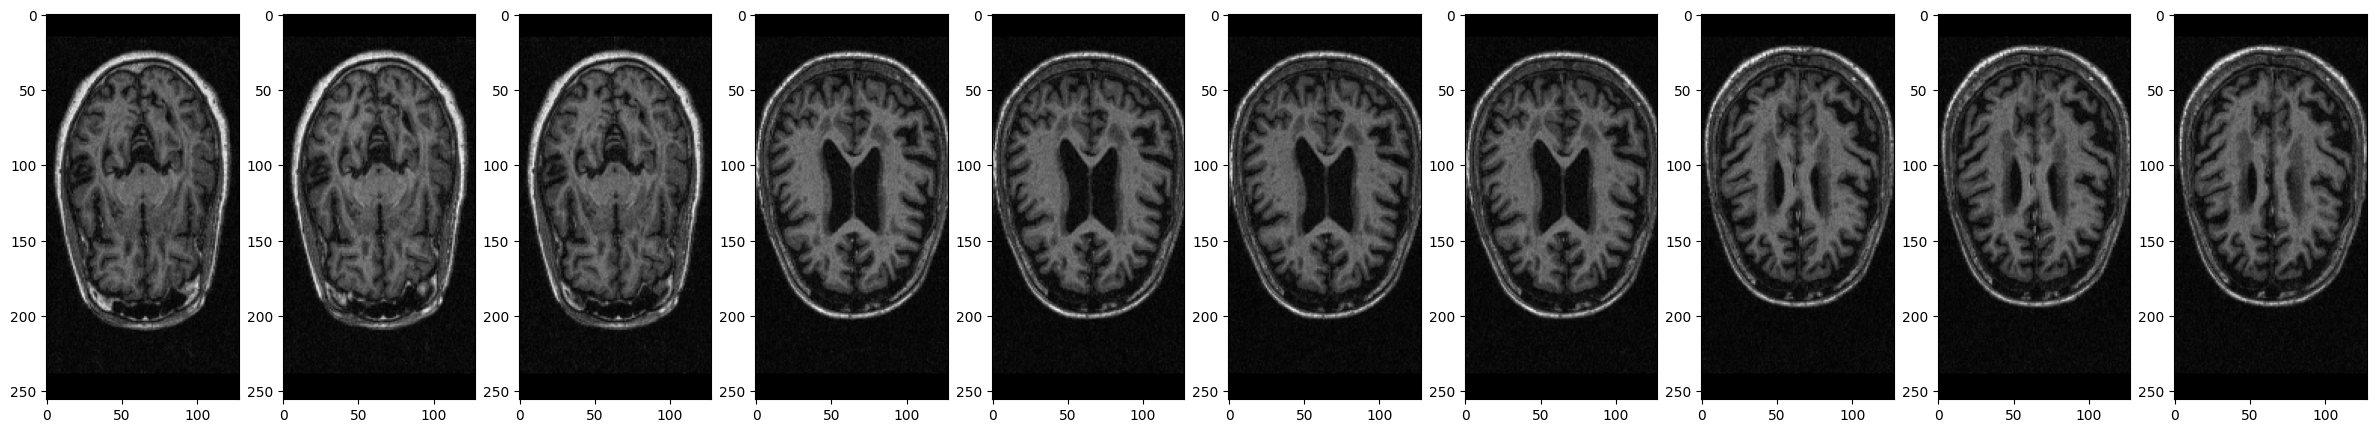

In [84]:
# 3차원 이미지(영상)이기 때문에, 원하는 영역만을 불러와야 하는 것 같다.
fig, axes = plt.subplots(1, 10, figsize=(30, 5))
for i in range(10):
    axes[i].imshow(imgs[i][:, 150, :], cmap='gray')
print(len(imgs))

220


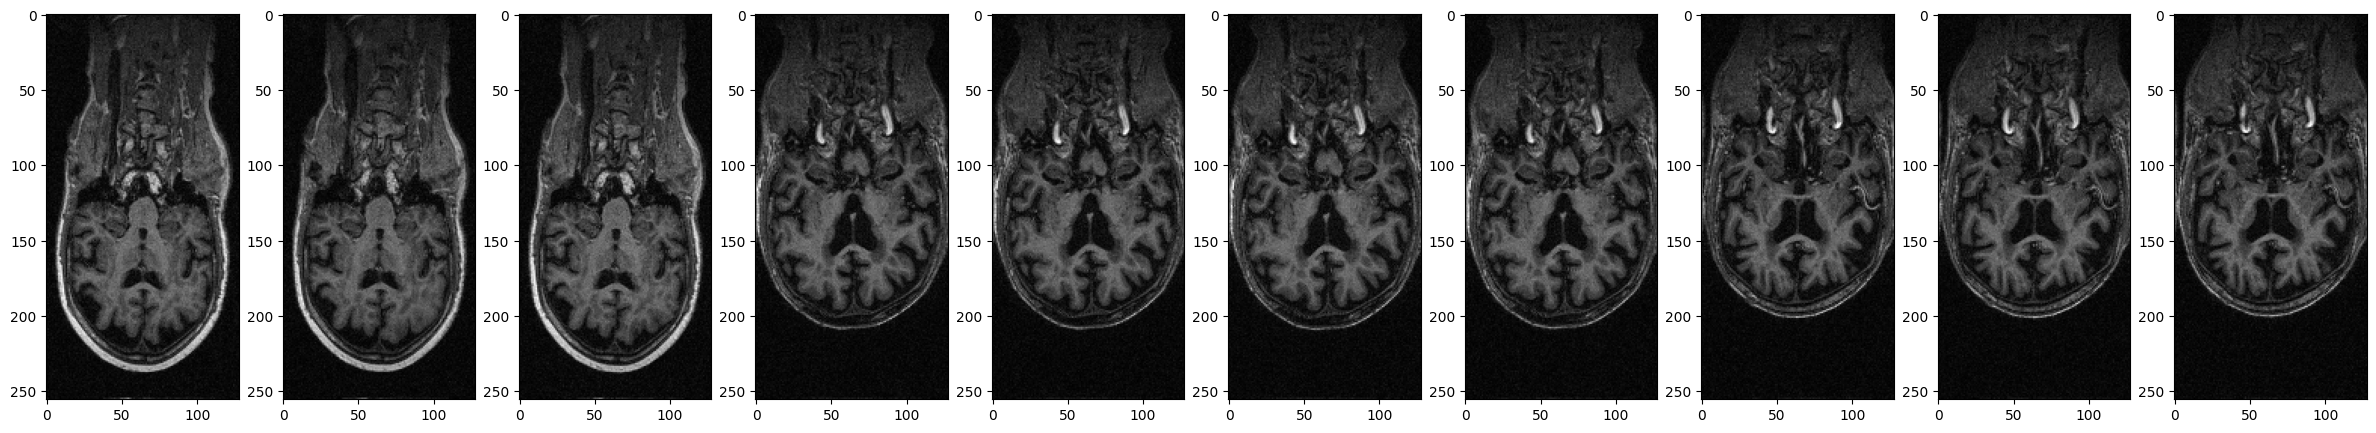

In [69]:
fig, axes = plt.subplots(1, 10, figsize=(30, 5))
for i in range(10):
    axes[i].imshow(imgs[i][120, :, :], cmap='gray')
print(len(imgs))

In [11]:
axes[0].imshow(imgs[0][:,:,60])
axes[1].imshow(imgs[1][:,:,127])

In [12]:
# 59층의 이미지만 가져오기
temp_imgs = [img[:,:,59] for img in imgs]

In [13]:
temp_imgs

[array([[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        ...,
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]]),
 array([[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        ...,
 
       

In [7]:
def clearFilePath(path):
    file_name = re.sub(".*" + "/oasis2/", '', path)
    file_name = re.sub('/','_',file_name)
    file_name = re.sub('mpr-','',file_name)
    file_name = re.sub('.nifti.img','',file_name)
    return file_name

In [8]:
rootdir = '../OASIS-2 dataset/'

In [88]:
mri_patients_scan_name = []
mri_ignored_file_names = []
mri_images = []
mri_images_data = []

file_count = sum(len(files) for _, _, files in os.walk(rootdir))
print(f"{file_count} files found in '{rootdir}' subdirectories")

789 files found in '../OASIS-2 dataset/' subdirectories


In [91]:
print("Lading MRI nifti.img files:")

with tqdm(total=file_count) as pbar: # tqdm을 사용하여 프로그레스바 표시
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            filepath = os.path.join(subdir, file)

            if filepath.endswith("nifti.img"): # 파일 확장자가 nifti.img인 경우
                try:
                    # 이미지 파일을 로드하여 mri_images 리스트에 추가
                    mri_images.append(nib.load(filepath))
                    
                    # 파일 경로에서 환자 스캔 이름을 추출하여 mri_patients_scan_name 리스트에 추가
                    mri_patients_scan_name.append(clearFilePath(filepath))
                    
                    # 이미지 데이터를 3D numpy 배열로 변환하여 mri_images_data 리스트에 추가
                    mri_images_data.append(img.get_fdata())
                
                except nib.filebasedimages.ImageFileError as e:
#                     mri_ignored_file_names = np.append(mri_ignored_file_names, filepath)
                    mri_ignored_file_names.append(filepath)
                    print(f'File type not recognized - ignoring "{filepath}" file')
                    
            pbar.update(1) 

print(f'\nFound and loaded {len(mri_patients_scans_name)} MRI "nifti.img" files from "{rootdir}" subdirectories')
print(f'Ignored:')
print(*mri_ignored_file_names, sep=' ')

mri_patients_visits_names = np.unique([re.sub('_\d\Z', '', i) for i in mri_patients_scans_name])
df_demographics = df_demographics_input[df_demographics_input['MRI ID'].isin(mri_patients_visits_names)]

print("Before cleaning data from none values from demographics:")
print(f'Number of patients visits: {len(np.unique(mri_patients_visits_names))}')
print(f'Number of patients scans: {len(mri_patients_scans_name)}')
print(f'Number of slices of MRI scans (unique values): {np.unique([arr.shape[2] for arr in mri_images_data])}')

df_drop = df_demographics[df_demographics.isna().any(axis=1)]
list_drop = df_drop['MRI ID'].tolist()
print(f'None value rows in demographics data to drop: {df_demographics.isnull().any(axis=1).sum()}')
df_demographics = df_demographics.dropna().reset_index(drop=True)
fname_drop = [fname for fname in mri_patients_scans_name if re.sub('_\d\Z','',fname) in list_drop]
fname_drop_id = [i for i in range(len(mri_patients_scans_name)) if mri_patients_scans_name[i] in fname_drop]

for i in reversed(fname_drop_id):
    del mri_images[i]
    del mri_patients_scans_name[i]
    del mri_images_data[i]
    
print("After cleaning data from none values from demographics:")
print(f'Number of removed MRI files: {len(fname_drop)}')
print(f'Number of patients visits: {len(np.unique(mri_patients_visits_names))}')
print(f'Number of patients scans: {len(mri_patients_scans_name)}')

Lading MRI nifti.img files:


  0% 2/789 [00:00<00:00, 1125.38it/s]


AttributeError: 'memmap' object has no attribute 'get_fdata'

### U-net 모델